# Featurization, Model Selection & Tuning - Linear Regression

**Why is regularization required ?**

We are well aware of the issue of 'Curse of dimensionality', where the no. of columns are so huge that the no. of rows does not cover all the permutation and combinations that is applicable for this dataset.
For eg: Data having 10 columns should have 10! rows but it has only 1000 rows

Therefore,when we depict this graphically there would be lot of white spaces as the datapoints for those regions may not be covered in the dataset.

If a  linear regression model is tested over such a data, the model will tend to overfit this data by having sharp peaks & slopes. Such a model would have 100% training accuracy but would definitely fail in the test environment.

Thus arose the need of introducing slight errors in the form of giving smooth bends instead of sharp peaks (thereby reducing overfit).This is achieved by tweaking the model parameters (coefficients) and the hyperparameters (penalty factor) of the model.

## Agenda

* Perform basic EDA
* Scale data and apply Linear, Ridge & Lasso Regression with Regularization 
* Compare the r^2 score to determine which of the above regression methods gives the highest score
* Compute Root mean squared error (RMSE) which inturn gives a better score than r^2
* Finally use a scatter plot to graphically depict the correlation between actual and predicted mpg values

# 1. Import packages and observe dataset

In [1]:
#Import numerical libraries
import pandas as pd
import numpy as np

#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


In [2]:
SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True

In [3]:
dataset = pd.read_csv(r"D:\Dropbox\DS & AI\Full stack DS and AI course\21 Jun\250621 car-mpg.csv")
dataset.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


We have to predict the mpg column given the features.

# 2. Model building

Here we would like to scale the data as the columns are varied which would result in 1 column dominating the others.

First we divide the data into independent (X) and dependent data (y) then we scale it. 

#### Tip!: ####

*The reason we don't scale the entire data before and then divide it into train(X) & test(y) is because once you scale the data, the type(data_s) would be numpy.ndarray. It's impossible to divide this data when it's an array. 
*

Hence we divide type(data) pandas.DataFrame, then proceed to scaling it.

In [4]:
# Drop non-numeric column
dataset = dataset.drop(['car_name'], axis=1)


In [5]:
# Replace origin codes with region labels
dataset['origin'] = dataset['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [6]:
# Convert categorical 'origin' column to dummy variables
dataset = pd.get_dummies(dataset,columns = ['origin'], dtype=int)

In [7]:
# Replace '?' with NaN, then convert applicable columns to numeric
dataset = dataset.replace('?', np.nan)
dataset = dataset.apply(pd.to_numeric, errors='ignore')  # Ensures '?' replaced columns are numeric

C:\Users\Dell\AppData\Local\Temp\ipykernel_21600\3504715553.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dataset = dataset.apply(pd.to_numeric, errors='ignore')  # Ensures '?' replaced columns are numeric


In [8]:
# Fill missing values with median only for numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_cols] = dataset[numeric_cols].apply(lambda x: x.fillna(x.median()))

In [9]:
X = dataset.drop(['mpg'], axis=1) # independent variables
y = dataset['mpg'] # dependent variable
# Split the dataset into training and testing sets

In [11]:
if dataset.empty:
      print('The series object has no columns.')
else:
      print('The series object has columns.')

The series object has columns.


In [41]:
# scaling the data
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) #converting scaled data into dataframe

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns) #ideally train, test data should be in columnss


AttributeError: 'Series' object has no attribute 'columns'

In [14]:
X_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [ ]:
dataset.shape

(398, 11)

In [13]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=0)
X_train.shape

(318, 10)

## 2.a Simple Linear Model

In [17]:
#Fit simple linear model and find coefficients
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.24638776053571607
The coefficient for disp is 0.29177092098664514
The coefficient for hp is -0.18081621820393654
The coefficient for wt is -0.6675530609868133
The coefficient for acc is 0.06537309205777078
The coefficient for yr is 0.348177025942672
The coefficient for car_type is 0.3339231253960362
The coefficient for origin_america is -0.08117984631927024
The coefficient for origin_asia is 0.06986098209664919
The coefficient for origin_europe is 0.030003161242288134
The intercept is -0.018006831370923248


## 2.b Regularized Ridge Regression

In [19]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(X_train, y_train)

print('Ridge model coef: {}'.format(ridge_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here 

Ridge model coef: [ 0.24342352  0.28293268 -0.18074242 -0.65967997  0.06398366  0.34745486
  0.33096428 -0.08087356  0.06988696  0.0295866 ]


## 2.c Regularized Lasso Regression

In [20]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here  

Lasso model coef: [-0.         -0.         -0.07247557 -0.45867691  0.          0.2698134
  0.11341188 -0.04988145  0.          0.        ]


Here we notice many coefficients are turned to 0 indicating drop of those dimensions from the model

# 3. Score Comparison

In [21]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 


#Simple Linear Model
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8373422857977738
0.8474768646673948
*************************
0.8373329560874541
0.8472637866465941
*************************
0.8007202116330951
0.8283046020148332


## Polynomial Features
If you wish to further compute polynomial features, you can use the below code.

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)

#Fit calculates u and std dev while transform applies the transformation to a particular set of examples
#Here fit_transform helps to fit and transform the X_s
#Hence type(X_poly) is numpy.array while type(X_s) is pandas.DataFrame 

X_poly = poly.fit_transform(X_s)

#Similarly capture the coefficients and intercepts of this polynomial feature model

# 4. Model Parameter Tuning

- r^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. 
- Instead we use adjusted r^2 which removes the statistical chance that improves r^2 (adjusted r^2 = r^2 - fluke)
- Scikit does not provide a facility for adjusted r^2... so we use statsmodel, a library that gives results similar to what you obtain in R language
- This library expects the X and Y to be given in one single dataframe

In [28]:
# Convert y_train to DataFrame before concatenation
y_train_df = pd.DataFrame(y_train, index=X_train.index, columns=['mpg'])
dataset_train_test = pd.concat([X_train, y_train_df], axis=1)
dataset_train_test.head()


,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
64,1.498191,1.196232,1.197027,1.376929,-0.750880,-1.085858,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
55,-0.856321,-0.925936,-1.160564,-1.343645,1.246054,-1.356642,0.941412,-1.292726,-0.497643,2.164651,0.446497
317,-0.856321,-0.925936,-0.689046,-0.925095,0.084201,1.080415,0.941412,-1.292726,-0.497643,2.164651,1.381656
102,-0.856321,-0.925936,-1.527300,-1.206493,1.972212,-0.815074,0.941412,-1.292726,-0.497643,2.164651,0.318393
358,-0.856321,-0.705077,-0.793827,-0.396587,0.991899,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.035775


In [31]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula='mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data=dataset_train_test).fit()
ols1.params

Intercept        -0.018007
cyl               0.246388
disp              0.291771
hp               -0.180816
wt               -0.667553
acc               0.065373
yr                0.348177
car_type          0.333923
origin_america   -0.081180
origin_europe     0.030003
origin_asia       0.069861
dtype: float64

In [32]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sat, 21 Jun 2025   Prob (F-statistic):          7.60e-116
Time:                        22:20:53   Log-Likelihood:                -160.75
No. Observations:                 318   AIC:                             341.5
Df Residuals:                     308   BIC:                             379.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0180      0.023     -0.

In [33]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.39853963361814243


**So there is an avg. mpg difference of 0.37 from real mpg**

In [36]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 1000x800 with 0 Axes>

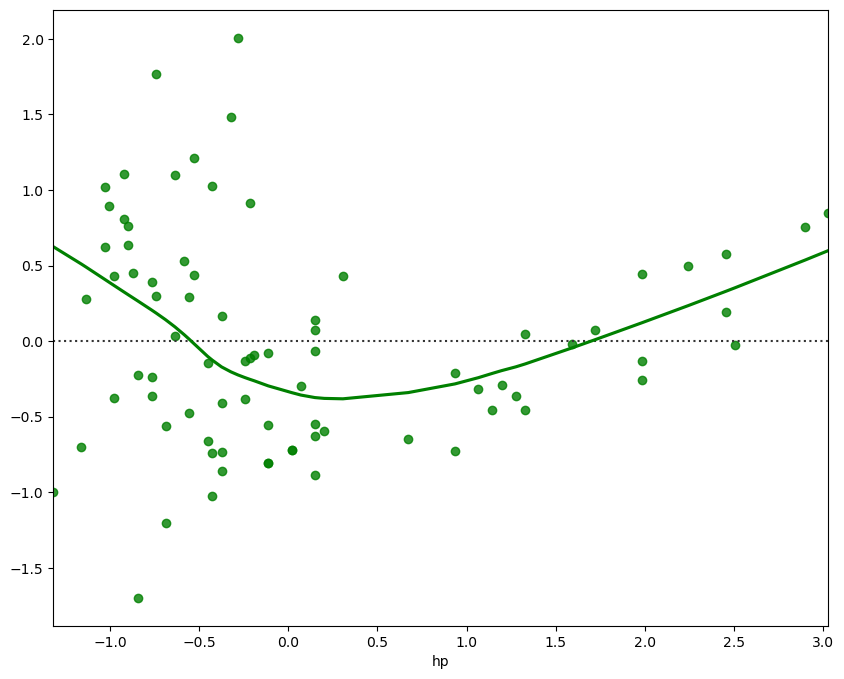

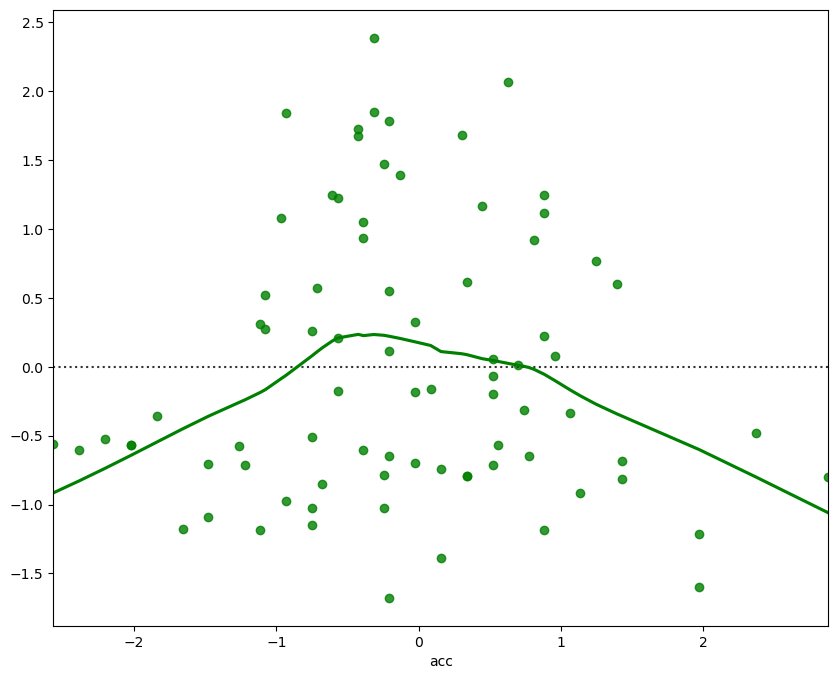

<Figure size 1000x800 with 0 Axes>

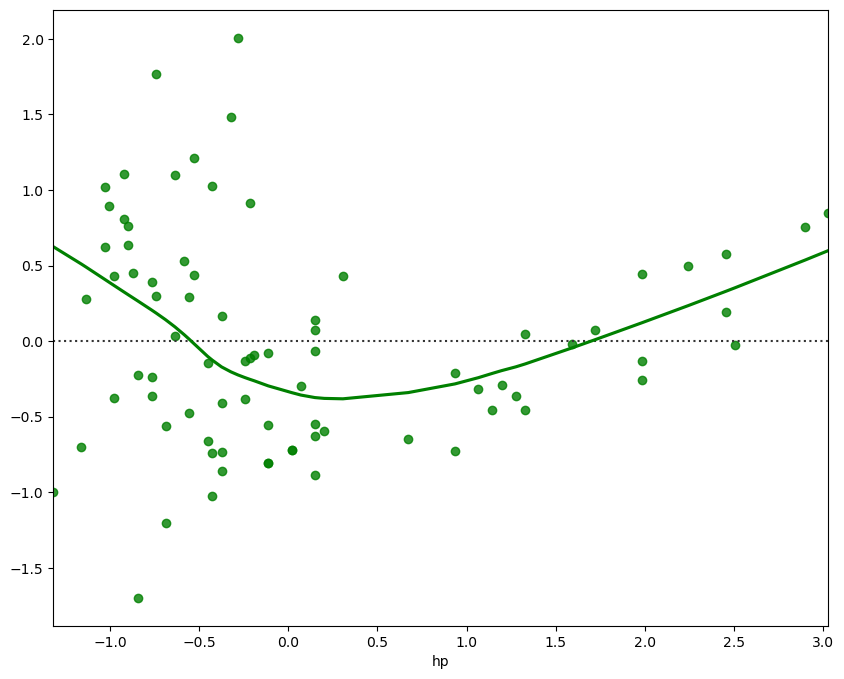

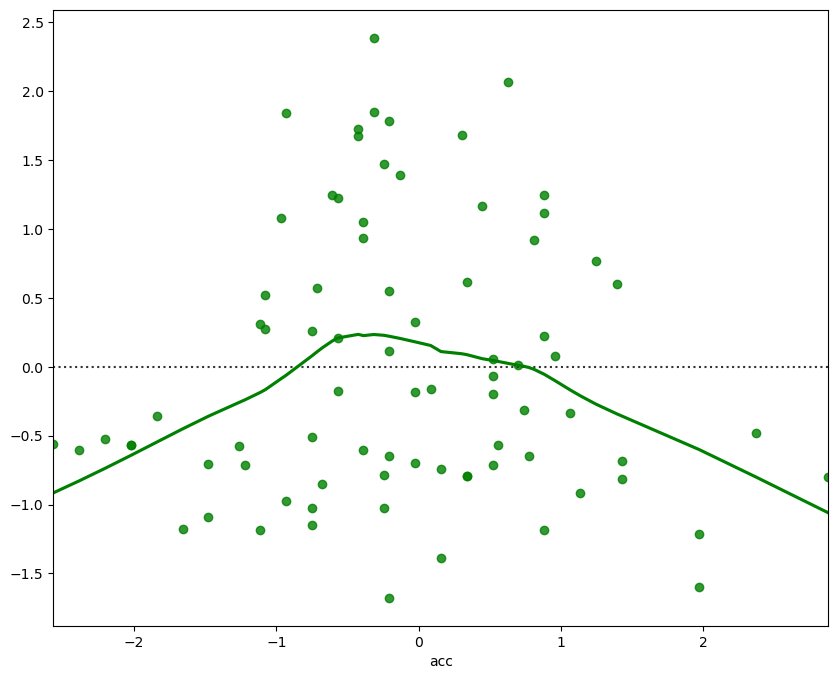

In [37]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test, color='green', lowess=True )
plt.show()

In [38]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'], y_pred)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

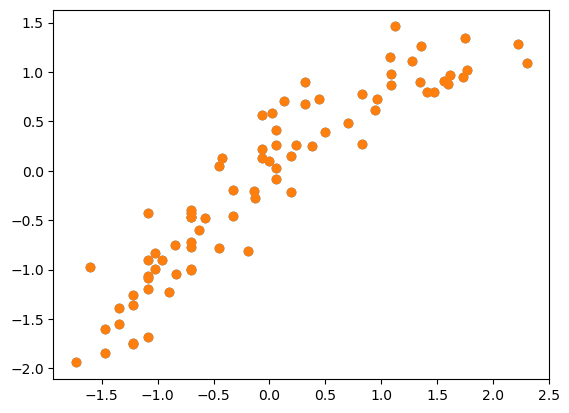

In [40]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test, y_pred)
plt.show()

# 5. Inference
**Both Ridge & Lasso regularization performs very well on this data, though Ridge gives a better score. The above scatter plot depicts the correlation between the actual and predicted mpg values.**

***This kernel is a work in progress.***